In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df = pd.read_csv(r'C:\Users\Sooraj\Downloads\Fraud_check.csv')

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
label_encoder = preprocessing.LabelEncoder()
df['Undergrad'] = label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status'] = label_encoder.fit_transform(df['Marital.Status'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])

In [5]:
df['Taxable.Income'] = np.where(df['Taxable.Income'] <= 30000, 'Risky', 'Good')

In [6]:
X=df.drop('Taxable.Income', axis=1)
y=df['Taxable.Income']

In [7]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [8]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

In [9]:
# Splitting data into training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building Decision Tree Classifier using Entropy Criteria

In [10]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

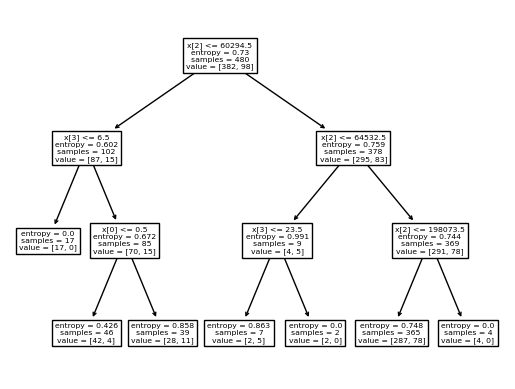

In [11]:
#PLot the decision tree
tree.plot_tree(model);


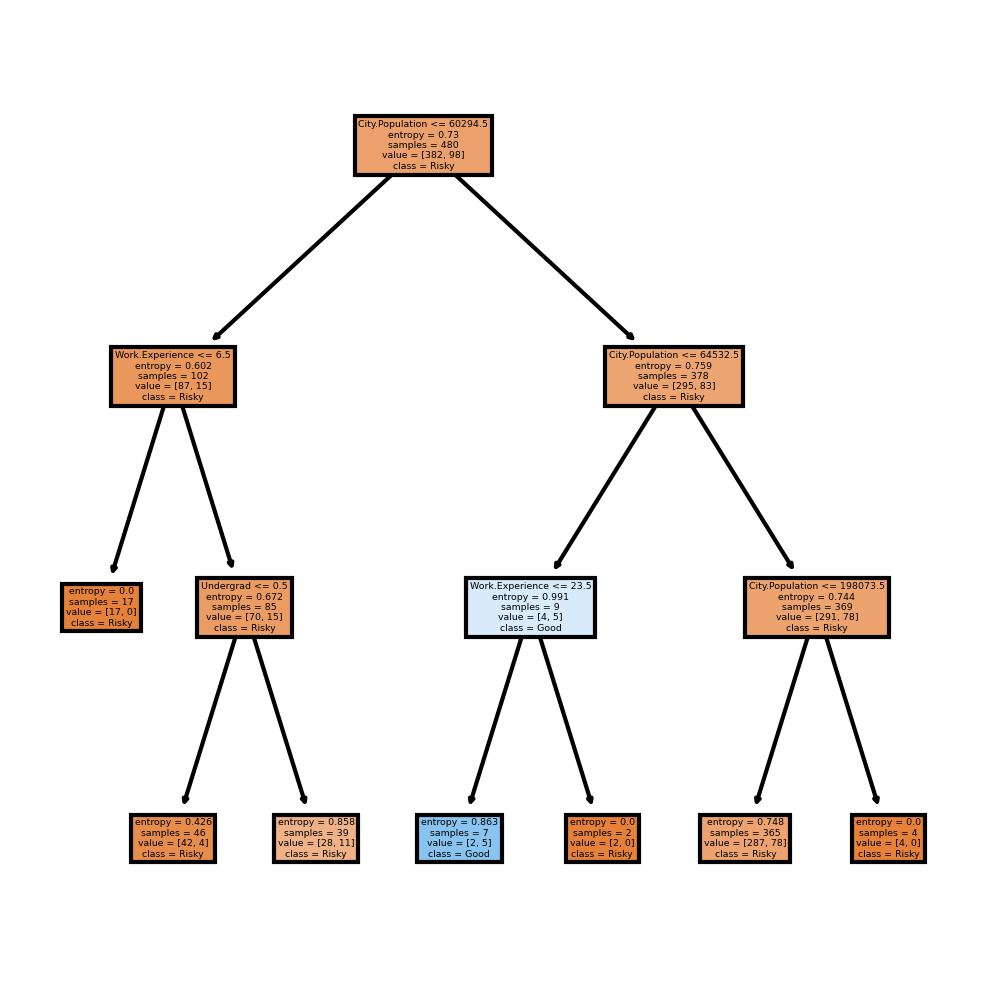

In [12]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience', 'Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [13]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good     118
Risky      2
dtype: int64

In [14]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
    

In [15]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
Taxable.Income,,
Good,92,2
Risky,26,0


In [16]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

In [17]:
y_pred_entropy = model.predict(X_test)

In [18]:
classification_rep_entropy = classification_report(y_test, y_pred_entropy)

In [19]:
print(classification_rep_entropy)

              precision    recall  f1-score   support

        Good       0.78      0.98      0.87        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.77       120
   macro avg       0.39      0.49      0.43       120
weighted avg       0.61      0.77      0.68       120



### Building Decision Tree Classifier (CART) using Gini Criteria

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [21]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

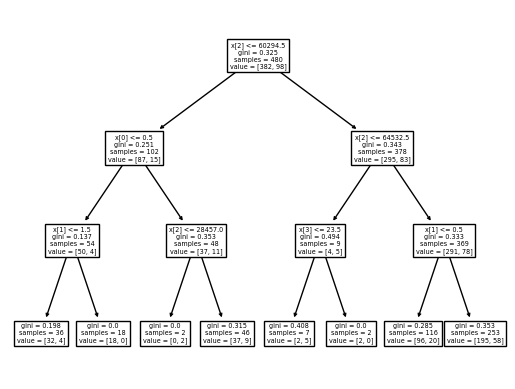

In [22]:
#PLot the decision tree
tree.plot_tree(model_gini);


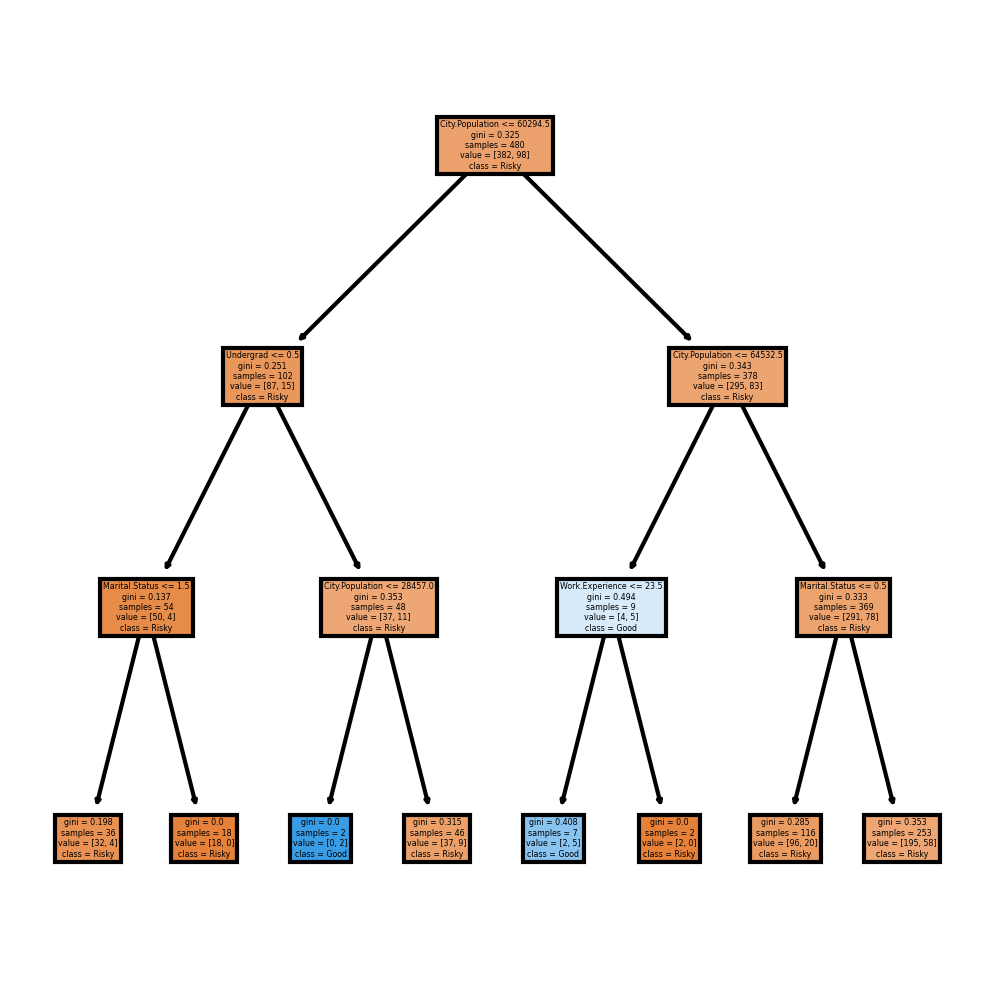

In [23]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience', 'Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [24]:
#Prediction and computing the accuracy
pred=model_gini.predict(X_test)
np.mean(preds==y_test)

0.7666666666666667

In [25]:
y_pred_gini = model_gini.predict(X_test)

In [26]:
classification_rep_gini = classification_report(y_test, y_pred_gini)

In [27]:
print(classification_rep_gini)

              precision    recall  f1-score   support

        Good       0.78      0.97      0.86        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.76       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.61      0.76      0.68       120



## Alternate way to visualize

In [28]:
from sklearn.tree import plot_tree

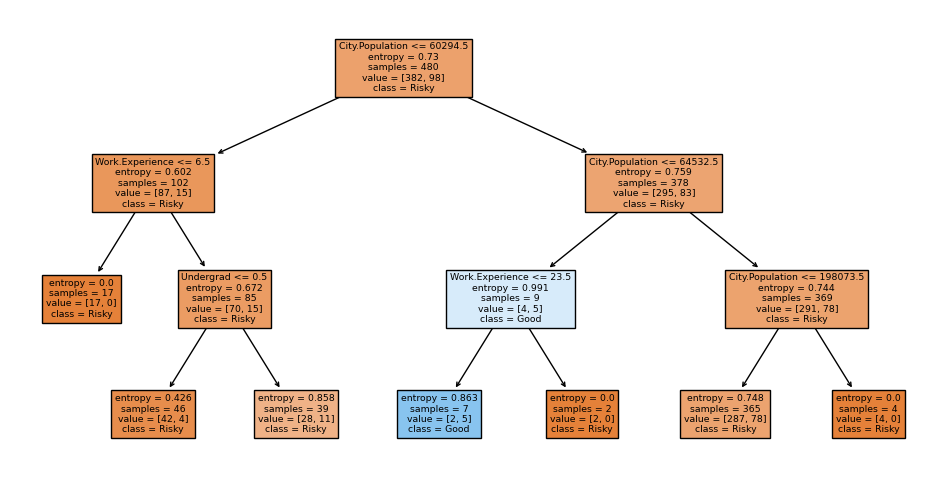

In [29]:
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Risky', 'Good'])
plt.show()

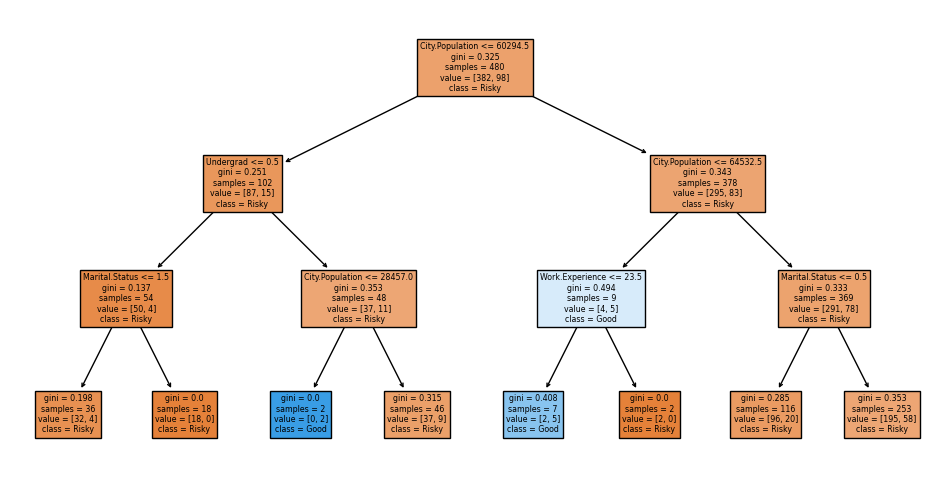

In [30]:
plt.figure(figsize=(12, 6))
plot_tree(model_gini, filled=True, feature_names=X.columns, class_names=['Risky', 'Good'])
plt.show()